1. Why loss is better than gradient-norm?
Though gradient-norm and loss value will all decrease as the training goes, gradient-norm is easier to oscillate than loss value, since it is not our direct objective. That will cause the probability distribution more "unbalanced".

In [1]:
!pwd

/Users/haoranzhang/Documents/haoran/mmfl-Dec


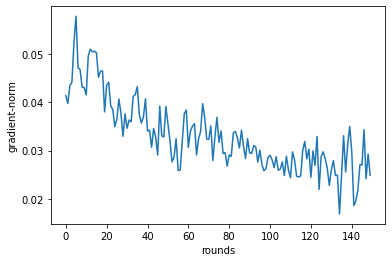

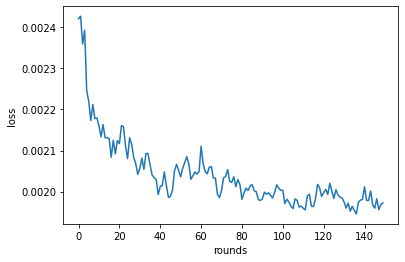

In [64]:
import numpy as np
folder_name = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_OS_14"
# read gradient_AS.pkl
import pickle
with open(folder_name+"/gradient_OS.pkl", "rb") as f:
    gradient_OS = pickle.load(f)
# last round
gradient_OS = np.array(gradient_OS)[:, 2]
import matplotlib.pyplot as plt
length = range(len(gradient_OS))
plt.plot(length, gradient_OS)
# x-axis: rounds, y: gradient-norm
plt.xlabel("rounds")
plt.ylabel("gradient-norm")
plt.show()

folder_name = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_AS_14"
# read gradient_AS.pkl
import pickle
with open(folder_name+"/gradient_AS.pkl", "rb") as f:
    gradient_AS = pickle.load(f)
# last round
loss_AS = np.array(gradient_AS)[:, 2]
import matplotlib.pyplot as plt
length = range(len(loss_AS))
plt.plot(length, loss_AS)
plt.xlabel("rounds")
plt.ylabel("loss")
plt.show()

In [65]:
# folder_name = "./result/5task_nnnnn_mse_lessVennc0.1_AS_a1_17"
folder_name = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_AS_14"
task_num = 1
# read localLoss_exp0_algo0.npy
import numpy as np
localLoss_exp0_algo0 = np.load(folder_name+"/localLoss_exp0_algo0.npy")
print('5 task, each task, loss distribution in a specific round')
one_client_task_loss = localLoss_exp0_algo0[0, :, 109]
# plot one client task loss
import matplotlib.pyplot as plt
# sort and plot
# plot 5 plots, using subplots
#fig, axs = plt.subplots(task_num, 1, figsize=(10, 10))
# for i in range(task_num):
#     one_client_task_loss = localLoss_exp0_algo0[i, :, -1]
#     sorted_index = np.argsort(one_client_task_loss)
#     axs[i].bar(np.arange(120), one_client_task_loss[sorted_index])
#plt.show()

import pickle
# read folder_name+dis.pkl
with open(folder_name+"/dis.pkl", "rb") as f:
    dis = pickle.load(f)

# Mi1 =localLoss_exp0_algo0[0,:,-1]*dis[0]+\
#     localLoss_exp0_algo0[1,:,-1]*dis[1]+\
#     localLoss_exp0_algo0[2,:,-1]*dis[2]+\
#     localLoss_exp0_algo0[4,:,-1]*dis[4]+\
#     localLoss_exp0_algo0[3,:,-1]*dis[3]
# sorted_index1 = np.argsort(Mi1)
# plt.bar(np.arange(120), Mi1[sorted_index1])
# plt.show()

with open(folder_name+"/client_task_ability.pkl", "rb") as f:
    client_task_ability = pickle.load(f)
client_task_ability = np.array(client_task_ability)

# if without shakespear (task index=3)
# Mi2 =localLoss_exp0_algo0[0,:,-1]*dis[0]/client_task_ability+\
#     localLoss_exp0_algo0[1,:,-1]*dis[1]/client_task_ability+\
#     localLoss_exp0_algo0[2,:,-1]*dis[2]/client_task_ability+\
#     localLoss_exp0_algo0[4,:,-1]*dis[4]/client_task_ability+\
#     localLoss_exp0_algo0[3,:,-1]*dis[3]/client_task_ability
# sorted_index2 = np.argsort(Mi2)


# color_list_processor1 = []
# for index in sorted_index1:
#     if client_task_ability[index] == 1:
#         color_list_processor1.append('blue')
#     elif client_task_ability[index] == 2:
#         color_list_processor1.append('green')
#     elif client_task_ability[index] == 3:
#         color_list_processor1.append('yellow')
#     elif client_task_ability[index] == 4:
#         color_list_processor1.append('orange')
#     elif client_task_ability[index] == 5:
#         color_list_processor1.append('red')
#
#
#
# color_list_processor2 = []
# for index in sorted_index2:
#     if client_task_ability[index] == 1:
#         color_list_processor2.append('blue')
#     elif client_task_ability[index] == 2:
#         color_list_processor2.append('green')
#     elif client_task_ability[index] == 3:
#         color_list_processor2.append('yellow')
#     elif client_task_ability[index] == 4:
#         color_list_processor2.append('orange')
#     elif client_task_ability[index] == 5:
#         color_list_processor2.append('red')
#
#
# plt.bar(np.arange(120), Mi1[sorted_index1], color=color_list_processor1)
# plt.show()
# plt.bar(np.arange(120), Mi2[sorted_index2], color=color_list_processor2)
# plt.show()


5 task, each task, loss distribution in a specific round


In [66]:
# connect processor index and client index
processor2client = {}
processor_num = sum(client_task_ability)
p_index = 0
for c_index in range(120):
    for _ in range(client_task_ability[c_index]):
        processor2client[p_index] = c_index
        p_index += 1

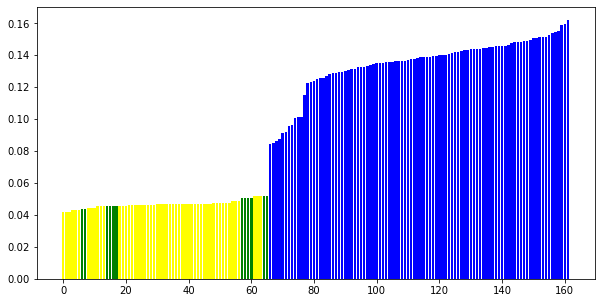

In [67]:
# plot psi distribution
with open(folder_name+"/psi_AS.pkl", "rb") as f:
    psi = pickle.load(f)
psi = np.array(psi[-1])
# psi = psi.reshape(-1)
psi_sum = np.sum(psi, axis=0)
# sort and plot bar
sorted_index = np.argsort(psi_sum)
# plot
# color
color_list_processor = []
for p_index in sorted_index:
    index = processor2client[p_index]
    if client_task_ability[index] == 1:
        color_list_processor.append('blue')
    elif client_task_ability[index] == 2:
        color_list_processor.append('green')
    elif client_task_ability[index] == 3:
        color_list_processor.append('yellow')
    elif client_task_ability[index] == 4:
        color_list_processor.append('orange')
    elif client_task_ability[index] == 5:
        color_list_processor.append('red')
import matplotlib.pyplot as plt
length = range(len(psi_sum))

plt.figure(figsize=(10, 5))
plt.bar(length, psi_sum[sorted_index], color=color_list_processor)
plt.show()

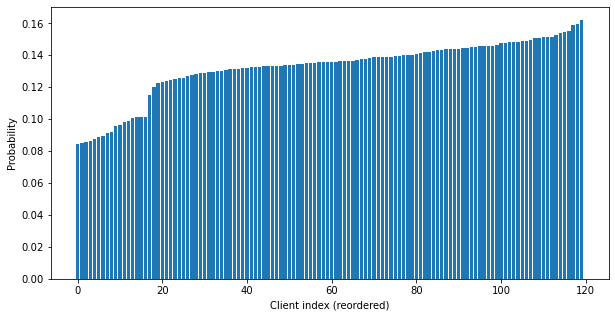

In [68]:
p_client = np.zeros(120)
p_N = psi_sum.shape[0]
for processor_index in range(p_N):
    client_index = processor2client[processor_index]
    process_num = client_task_ability[client_index]
    p_client[client_index] = 1 - (1-psi_sum[processor_index])**process_num
# sort and plot bar
sorted_index = np.argsort(p_client)
# color
# color_list_processor = []
# for c_index in sorted_index:
#     index = c_index
#     if client_task_ability[index] == 1:
#         color_list_processor.append('blue')
#     elif client_task_ability[index] == 2:
#         color_list_processor.append('green')
#     elif client_task_ability[index] == 3:
#         color_list_processor.append('yellow')
#     elif client_task_ability[index] == 4:
#         color_list_processor.append('orange')
#     elif client_task_ability[index] == 5:
#         color_list_processor.append('red')
# plot
import matplotlib.pyplot as plt
length = range(len(p_client))
plt.figure(figsize=(10, 5))
plt.bar(length, p_client[sorted_index])
plt.ylabel("Probability")
plt.xlabel("Client index (reordered)")
plt.show()

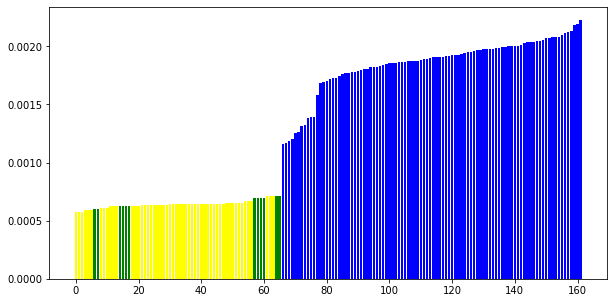

In [69]:
import numpy as np
# read gradient_AS.pkl
import pickle
with open(folder_name+"/gradient_AS.pkl", "rb") as f:
    gradient_AS = pickle.load(f)
# last round
gradient_AS = gradient_AS[-1]
# sort and plot bar
sorted_index3 = np.argsort(gradient_AS)


color_list_processor3 = []
for p_index in sorted_index3:
    index = processor2client[p_index]
    if client_task_ability[index] == 1:
        color_list_processor3.append('blue')
    elif client_task_ability[index] == 2:
        color_list_processor3.append('green')
    elif client_task_ability[index] == 3:
        color_list_processor3.append('yellow')
    elif client_task_ability[index] == 4:
        color_list_processor3.append('orange')
    elif client_task_ability[index] == 5:
        color_list_processor3.append('red')

import matplotlib.pyplot as plt
length = range(len(gradient_AS))
# make plot wider
plt.figure(figsize=(10, 5))
plt.bar(length, gradient_AS[sorted_index3], color=color_list_processor3)
plt.show()

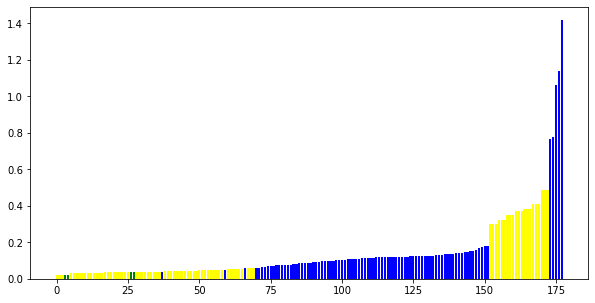

In [70]:
import numpy as np
# read gradient_AS.pkl
import pickle
#folder_name_OS = "./result/5task_nnnnn_mse_lessVennc0.1_OS_a1_17"
folder_name_OS = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_OS_18"
with open(folder_name_OS+"/gradient_OS.pkl", "rb") as f:
    gradient_OS = pickle.load(f)
# last round
gradient_OS = gradient_OS[1]
# sort and plot bar
sorted_index4 = np.argsort(gradient_OS)
# read client_task_ability.pkl
with open(folder_name_OS+"/client_task_ability.pkl", "rb") as f:
    client_task_ability = pickle.load(f)

# connect processor index and client index
processor2client = {}
processor_num = sum(client_task_ability)
p_index = 0
for c_index in range(120):
    for _ in range(client_task_ability[c_index]):
        processor2client[p_index] = c_index
        p_index += 1


color_list_processor4 = []
for p_index in sorted_index4:
    index = processor2client[p_index]
    if client_task_ability[index] == 1:
        color_list_processor4.append('blue')
    elif client_task_ability[index] == 2:
        color_list_processor4.append('green')
    elif client_task_ability[index] == 3:
        color_list_processor4.append('yellow')
    elif client_task_ability[index] == 4:
        color_list_processor4.append('orange')
    elif client_task_ability[index] == 5:
        color_list_processor4.append('red')

import matplotlib.pyplot as plt
length = range(len(gradient_OS))
# make plot wider
plt.figure(figsize=(10, 5))
plt.bar(length, gradient_OS[sorted_index4], color=color_list_processor4)
plt.show()

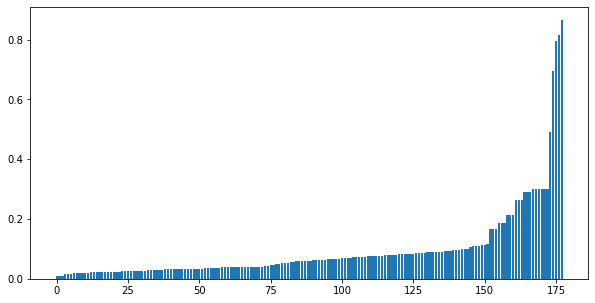

In [71]:
# plot psi distribution
with open(folder_name_OS+"/psi_OS.pkl", "rb") as f:
    psi = pickle.load(f)
psi = np.array(psi[-1])
# psi = psi.reshape(-1)
psi_sum = np.sum(psi, axis=0)
# sort and plot bar
sorted_index = np.argsort(psi_sum)
# plot
import matplotlib.pyplot as plt
length = range(len(psi_sum))

plt.figure(figsize=(10, 5))
plt.bar(length, psi_sum[sorted_index])
plt.show()


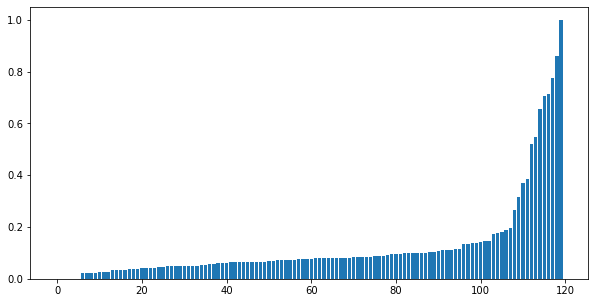

In [37]:
p_client = np.zeros(120)
p_N = psi_sum.shape[0]
for processor_index in range(p_N):
    client_index = processor2client[processor_index]
    process_num = client_task_ability[client_index]
    p_client[client_index] = 1 - (1-psi_sum[processor_index])**process_num
# sort and plot bar
sorted_index = np.argsort(p_client)
# color
# color_list_processor = []
# for c_index in sorted_index:
#     index = c_index
#     if client_task_ability[index] == 1:
#         color_list_processor.append('blue')
#     elif client_task_ability[index] == 2:
#         color_list_processor.append('green')
#     elif client_task_ability[index] == 3:
#         color_list_processor.append('yellow')
#     elif client_task_ability[index] == 4:
#         color_list_processor.append('orange')
#     elif client_task_ability[index] == 5:
#         color_list_processor.append('red')
# plot
p_client[sorted_index[:6]]=0
import matplotlib.pyplot as plt
length = range(len(p_client))
plt.figure(figsize=(10, 5))
plt.bar(length, p_client[sorted_index])
plt.show()

Using gradient-norm results in a more peaked distribution.
For each task, the punishment term:
$\left( \sum_{i \in \mathcal{A}_{\tau,s}} \frac{d_{i,s}}{v_i p_{s|i}^\tau} \right)^2$

In [2]:
# compue variance
def sampling_variance(psi):
    processes_num = psi.shape[1]
    p_s_i = psi
    tasks_num = p_s_i.shape[0]
    exp=1
    punishment = 0
    lr_list = []
    # compute punishment
    for task_index in range(tasks_num):
            punishment_each_task = 0
            for process_index in range(processes_num):
                client_index = processor2client[process_index]
                if p_s_i[task_index][process_index] == 0:
                    continue
                punishment_each_task += (dis[task_index][client_index] / client_task_ability[client_index])**2 / p_s_i[task_index][process_index] - (dis[task_index][client_index] / client_task_ability[client_index])**2
            punishment += punishment_each_task

    for _ in range(exp):
        allocation_result = np.zeros(processes_num, dtype=int)
        for process_idx in range(processes_num):
            if abs(1-np.sum(p_s_i[:, process_idx])) < 1e-6:
                p_not_choose = 0
            else:
                p_not_choose = 1 - np.sum(p_s_i[:, process_idx])
            # append p_not_choose to the head of p_s_i
            p_client = np.zeros(tasks_num+1)
            p_client[0] = p_not_choose
            p_client[1:] = p_s_i[:, process_idx]
            # normalize in case sum not 1
            p_client = p_client / np.sum(p_client)
            allocation_result[process_idx] = np.random.choice(np.arange(-1, tasks_num), p=p_client)
        allocation_result = allocation_result.tolist()
        clients_task = [s for s in allocation_result if s != -1]
        chosen_process_order = [i for i in range(len(allocation_result)) if allocation_result[i] != -1]
        chosen_clients = [processor2client[i] for i in chosen_process_order]

        punishment_avg = 0
        for task_index in range(tasks_num):
            punishment_each_task = 0
            for process_index in range(processes_num):
                client_index = processor2client[process_index]
                if p_s_i[task_index][process_index] == 0:
                    continue
                else:
                    # if client_idx is active, then add it
                    if client_index in chosen_clients:
                        punishment_each_task += dis[task_index][client_index] / client_task_ability[client_index] / p_s_i[task_index][process_index]
            if _ == 0:
                lr_list.append(punishment_each_task)

    return punishment, lr_list


In [65]:
# compute variance, AS
from tqdm import tqdm
import pickle
import numpy as np
seed_list = [14,15,16,17]
folder_variance_AS = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_AS_"
# 1task_nnnnn_lessVennc0.05uv0.90.01_AS_a1_14
# 3task_nnnnn_lessVennc0.1uv0.90.1_AS_14
# 5task_nnnnn_fffse_lessVenn_AS_a1_14
var_allsd = []
lr_allsd = []
for sd in seed_list:
    current_folder = folder_variance_AS+str(sd)
    with open(current_folder+"/psi_AS.pkl", "rb") as f:
        psi_AS = pickle.load(f)
    with open(current_folder+"/client_task_ability.pkl", "rb") as f:
        client_task_ability = pickle.load(f)
    # read dis
    with open(current_folder+"/dis.pkl", "rb") as f:
        dis = pickle.load(f)
    processor2client = {}
    processor_num = sum(client_task_ability)
    p_index = 0
    for c_index in range(120):
        for _ in range(client_task_ability[c_index]):
            processor2client[p_index] = c_index
            p_index += 1

    variance_AS = []
    lrAS_list = []
    for p_distribution in tqdm(psi_AS):
        var, lr = sampling_variance(p_distribution)
        variance_AS.append(var)
        lrAS_list.append(lr)
    var_allsd.append(variance_AS)
    lr_allsd.append(lrAS_list)
var_allsd = np.array(var_allsd)
lr_allsd = np.array(lr_allsd)
# average
variance_AS = np.mean(var_allsd, axis=0)
lrAS_list = np.mean(lr_allsd, axis=0)


100%|██████████| 150/150 [00:01<00:00, 110.42it/s]


In [66]:
# compute variance, OS
folder_variance_OS = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_OS_"
# 1task_nnnnn_lessVennc0.05uv0.90.01_OS_a1_14
# 3task_nnnnn_lessVennc0.1uv0.90.1_OS_14
# 5task_nnnnn_fffse_lessVenn_OS_a1_14
seed_list = [14,15,16,17]
var_allsd = []
lr_allsd = []
for sd in seed_list:
    current_folder = folder_variance_OS+str(sd)
    with open(current_folder+"/psi_OS.pkl", "rb") as f:
        psi_OS = pickle.load(f)
    with open(current_folder+"/client_task_ability.pkl", "rb") as f:
        client_task_ability = pickle.load(f)
    # read dis
    with open(current_folder+"/dis.pkl", "rb") as f:
        dis = pickle.load(f)
    processor2client = {}
    processor_num = sum(client_task_ability)
    p_index = 0
    for c_index in range(120):
        for _ in range(client_task_ability[c_index]):
            processor2client[p_index] = c_index
            p_index += 1
    variance_OS = []
    lrOS_list = []
    for p_distribution in tqdm(psi_OS):
        var, lr = sampling_variance(p_distribution)
        variance_OS.append(var)
        lrOS_list.append(lr)
    var_allsd.append(variance_OS)
    lr_allsd.append(lrOS_list)
var_allsd = np.array(var_allsd)
lr_allsd = np.array(lr_allsd)
# average
variance_OS = np.mean(var_allsd, axis=0)
lrOS_list = np.mean(lr_allsd, axis=0)
print(np.mean(variance_OS))

100%|██████████| 150/150 [00:01<00:00, 102.17it/s]

6.456473149668776


[6.75630267 6.48283434 6.83154257]
punishment avg ASF0 1.5846113076696444
punishment avg ASF0.1 6.456473149668776


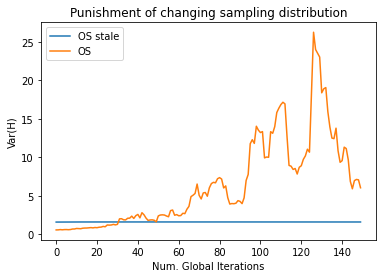

lr AS 0.9387386610353607
lr OS 48.04545896952982


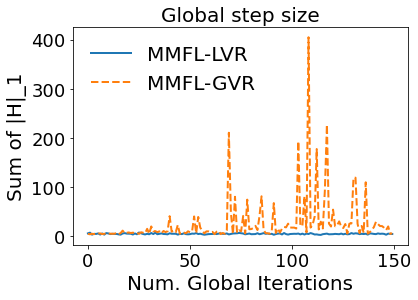

In [68]:
# plot variance
print(lrAS_list[1])
import matplotlib.pyplot as plt
print('punishment avg ASF0', np.mean(variance_AS))
print('punishment avg ASF0.1', np.mean(variance_OS))


plt.plot(variance_AS, label="OS stale")
plt.plot(variance_OS, label="OS")
plt.legend()
plt.ylabel("Var(H)")
plt.xlabel("Num. Global Iterations")
plt.title("Punishment of changing sampling distribution")
plt.show()

# plot lr
lrAS_list = np.array(lrAS_list) # shape should be 150 taskNum
lrOS_list = np.array(lrOS_list)
lrAS_listsum = np.mean(lrAS_list, axis=1)
lrOS_listsum = np.mean(lrOS_list, axis=1)
# plot
plt.plot(lrAS_listsum, label="MMFL-LVR", linewidth=2)
plt.plot(lrOS_listsum, label="MMFL-GVR", linestyle='--', linewidth=2)
# y log scale
#plt.yscale('log')
plt.legend(fontsize=20,frameon=False)
plt.ylabel("Sum of |H|_1", fontsize=20)
plt.xlabel("Num. Global Iterations", fontsize=20)
plt.title("Global step size", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.savefig("lr3task.pdf", format="pdf", bbox_inches="tight")
#plt.show()
# save image as pdf

# print lr variance
print('lr AS', np.std(lrAS_listsum))
print('lr OS', np.std(lrOS_listsum))

2. Each round, only select a subset of clients to update the loss.

In [17]:
# show an example of full sampling and downsampling.
folder_name_full = "./result/5task_iiiii_fffse_lessVenn_AS_a1_14"
folder_name_down = "./result/5task_nnnnn_distribution_f1lessVenn_ASF0.1_a1_14"
import numpy as np
localLoss_full = np.load(folder_name_full+"/localLoss_exp0_algo0.npy")
localLoss_down = np.load(folder_name_down+"/localLoss_exp0_algo0.npy")
# localLoss shape: 5(taskNum), 120(clientNum), 150(roundNum)
np.set_printoptions(precision=3, suppress=True)

In [20]:
round_full = 0
import time
from IPython.display import clear_output
for r in range(150):
    print("full sampling")
    print(localLoss_full[:, :10, round_full])
    round_full += 1
    # remove the current output
    clear_output(wait=True)
    # sleep for 0.5 sec
    time.sleep(0.2)

KeyboardInterrupt: 

In [19]:
round_down = 0
import time
from IPython.display import clear_output
for r in range(150):
    print("down sampling")
    print(localLoss_down[:, :10, round_down])
    round_down += 1
    # remove the current output
    clear_output(wait=True)
    # sleep for 0.5 sec
    time.sleep(0.2)

down sampling
[[0.072 0.087 0.105 0.083 0.073 0.081 0.063 0.073 0.107 0.079]
 [0.102 0.066 0.079 0.079 0.077 0.09  0.09  0.081 0.082 0.086]
 [0.072 0.079 0.095 0.107 0.074 0.089 0.075 0.103 0.077 0.079]
 [0.087 0.106 0.087 0.098 0.098 0.085 0.082 0.092 0.103 0.086]
 [0.123 0.071 0.099 0.08  0.112 0.084 0.08  0.092 0.084 0.1  ]]


(5, 120, 150)


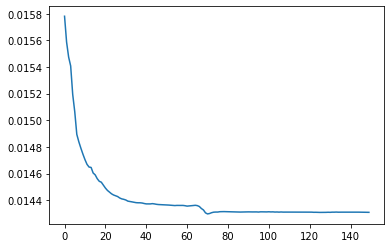

(5, 120, 150)


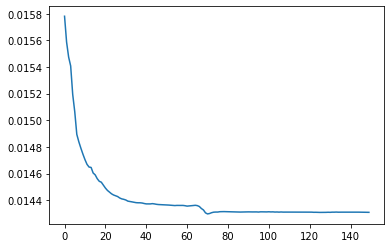

In [4]:
# fine-grained sampling.
folder_name = "./result/5task_nnnnn_distribution_lessVenn_full_u0.9_14"
# read localLoss_exp0_algo0.npy
import numpy as np
localLoss_exp0_algo0_AS = np.load(folder_name+"/localLoss_exp0_algo0.npy")
print(localLoss_exp0_algo0_AS.shape)
one_client_task_loss = localLoss_exp0_algo0_AS[2, 108, :]
# plot one client task loss
import matplotlib.pyplot as plt
plt.plot(one_client_task_loss)
plt.show()

# low sampling rate.
folder_name = "./result/5task_nnnnn_distribution_lessVenn_full_u0.9_14"
# read localLoss_exp0_algo0.npy
import numpy as np
localLoss_exp0_algo0 = np.load(folder_name+"/localLoss_exp0_algo0.npy")
print(localLoss_exp0_algo0.shape)
one_client_task_loss = localLoss_exp0_algo0[2, 108, :] #  tasknum, clientnum, roundnum
# plot one client task loss
import matplotlib.pyplot as plt
plt.plot(one_client_task_loss)
plt.show()

round = 150
# only looks into 1 task
rank_list = []
for r in range(round):
    # rank the loss across all clients
    clients_loss = localLoss_exp0_algo0_AS[2, :, r]
    # rank, and print rank indices
    rank = np.argsort(clients_loss)
    rank_list.append(rank)

In [5]:
# print top 20 and bottom 20 in each round
# record the rank of each client. for example, for client i, in round t, it ranks 10, in round t+1, it ranks 12.
client_rank_record = np.zeros((120, 150)) # client round
for r in range(round):
    # rank the loss across all clients
    clients_loss = localLoss_exp0_algo0_AS[2, :, r]
    # rank, and print rank indices
    rank = np.argsort(clients_loss)  # rank 120 is the largest loss, having the largest probability
    for i in range(120):
        client_rank_record[rank[i], r] = i


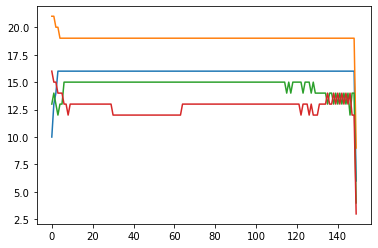

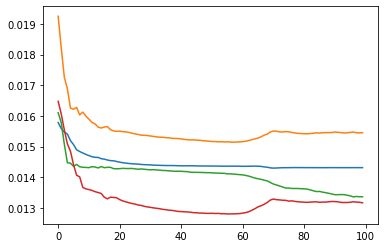

In [7]:
# plot the rank for a specific client
# print top 20 and bottom 20 in each round
# record the rank of each client. for example, for client i, in round t, it ranks 10, in round t+1, it ranks 12.
client_index = 108
plt.plot(client_rank_record[client_index, :])
plt.plot(client_rank_record[client_index+1, :])
plt.plot(client_rank_record[client_index+2, :])
plt.plot(client_rank_record[client_index+3, :])
#plt.plot(client_rank_record[client_index-100, :])
plt.show()
# the model is not powerful enough, though the loss can be decreased, but the rank is hard to overcome?

# print loss value of a specific client
client_index = 108
plt.plot(localLoss_exp0_algo0_AS[2, client_index, :][0:100])
plt.plot(localLoss_exp0_algo0_AS[2, client_index+1, :][0:100])
plt.plot(localLoss_exp0_algo0_AS[2, client_index+2, :][0:100])
plt.plot(localLoss_exp0_algo0_AS[2, client_index+3, :][0:100])
#plt.plot(localLoss_exp0_algo0_AS[2, client_index-100, :][0:100])
plt.show()

3. Number of parameters of each model

In [22]:
# Fashion-MNIST
import torch
from utility import model_list
num_classes = 10
cifar10_model = model_list.resnet(num_classes=num_classes)
fmnist_model = model_list.mnistCNN(num_classes=num_classes)
emnist_model = model_list.EMnistCNN()
sp_model = model_list.CharLSTM()

Number of parameters---
Fashion MNIST Model: 1,630,090
EMNIST Model: 1,769,375
Shakespeare Model: 952,400

In [3]:
# compare loss of different models
folder_fffse = "./result/5task_nnnnn_fffse_lessVenn_AS_a1_14"
# read mcf_i_globalLoss_exp0_algo0.npy
import numpy as np
globalLoss = np.load(folder_fffse+"/mcf_i_globalLoss_exp0_algo0.npy")
for i in range(5):
    print(np.mean(globalLoss[i, :]))


0.0037050707412901373
0.003962971024059113
0.004063743373325893
0.0063140095229546715
0.003341919360370984


In [2]:
# compare gradient level
folder_fffse = "./result/5task_nnnnn_fffse_lessVenn_OS_a1_18"
# read gradient_record_OS.pkl
import pickle
with open(folder_fffse+"/gradient_record_OS.pkl", "rb") as f:
    gradient_record_OS = pickle.load(f)
gradient_record = gradient_record_OS[-1]
for i in range(5):
    print(np.mean(gradient_record[i, :]))

5.149614917160943
6.300984455645084
6.758052129546801
2.5593423396348953
3.283054992556572


In [11]:
# record model parameters number
from utility import model_list
num_classes = 10
cifar10_model = model_list.resnet(num_classes=num_classes)
fmnist_model = model_list.mnistCNN(num_classes=num_classes)
emnist_model = model_list.EMnistCNN()
sp_model = model_list.CharLSTM()
all_models = [fmnist_model, fmnist_model, fmnist_model, sp_model, emnist_model]
model_parameters_list = []
for model in all_models:
    model_parameters_list.append(sum(p.numel() for p in model.parameters()))
print(model_parameters_list)


def generate_allocation(psi): # psi is only the distribution for one round
    processes_num = psi.shape[1]
    p_s_i = psi
    tasks_num = p_s_i.shape[0]

    allocation_result = np.zeros(processes_num, dtype=int)
    for process_idx in range(processes_num):
        if abs(1-np.sum(p_s_i[:, process_idx])) < 1e-6:
            p_not_choose = 0
        else:
            p_not_choose = 1 - np.sum(p_s_i[:, process_idx])
        # append p_not_choose to the head of p_s_i
        p_client = np.zeros(tasks_num+1)
        p_client[0] = p_not_choose
        p_client[1:] = p_s_i[:, process_idx]
        allocation_result[process_idx] = np.random.choice(np.arange(-1, tasks_num), p=p_client)
    allocation_result = allocation_result.tolist()
    clients_task = [s for s in allocation_result if s != -1]
    chosen_process_order = [i for i in range(len(allocation_result)) if allocation_result[i] != -1]
    chosen_clients = [processor2client[i] for i in chosen_process_order]
    return chosen_clients, clients_task

[1630090, 1630090, 1630090, 952400, 1769375]


In [12]:
# 0. see the result of ASF when we have full participation.
# 1. plot the benefit as the ratio of AS and random.
# 2. plot the accuracy as the communication increases.
# track the communication cost by looking using psi do the sampling.
# record model parameters number.
# compare gradient level
folder_communicationAS = "./result/5task_nnnnn_fffse_lessVenn_AS_a1_14"
# read client_task_ability.pkl
import pickle
import numpy as np
with open(folder_communicationAS+"/client_task_ability.pkl", "rb") as f:
    client_task_ability = pickle.load(f)
processor2client = {}
processor_num = sum(client_task_ability)
p_index = 0
for c_index in range(120):
    for _ in range(client_task_ability[c_index]):
        processor2client[p_index] = c_index
        p_index += 1

# use pis distribution to recover the sampling result
with open(folder_communicationAS+"/psi_AS.pkl", "rb") as f:
    psi = pickle.load(f)
round = 150
communication_cost_list = []
task_count_list = []
total_communication = 0
total_task_count = 0
for r in range(round):
    chosen_clients, clients_task = generate_allocation(psi[r])
    # based on
    for i in range(len(chosen_clients)):
        task_idx = clients_task[i]
        parameters_num = model_parameters_list[task_idx]
        total_communication += parameters_num
        total_task_count += 1
        # also consider AS needs uploading the loss value for all clients, and then send back the probability
    total_communication += 120*2
    communication_cost_list.append(total_communication)
    task_count_list.append(total_task_count)
communication_cost_listAS = communication_cost_list
task_count_listAS = task_count_list

In [13]:
folder_communicationOS = "./result/5task_nnnnn_fffse_lessVenn_OS_a1_14"
# read client_task_ability.pkl
import pickle
with open(folder_communicationOS+"/client_task_ability.pkl", "rb") as f:
    client_task_ability = pickle.load(f)
processor2client = {}
processor_num = sum(client_task_ability)
p_index = 0
for c_index in range(120):
    for _ in range(client_task_ability[c_index]):
        processor2client[p_index] = c_index
        p_index += 1

# use pis distribution to recover the sampling result
with open(folder_communicationOS+"/psi_OS.pkl", "rb") as f:
    psi = pickle.load(f)
round = 150
communication_cost_list = []
task_count_list = []
total_communication = 0
total_task_count = 0
for r in range(round):
    chosen_clients, clients_task = generate_allocation(psi[r])
    # based on
    for i in range(len(chosen_clients)):
        task_idx = clients_task[i]
        parameters_num = model_parameters_list[task_idx]
        total_communication += parameters_num
        # also consider AS needs uploading the loss value for all clients, and then send back the probability
    total_task_count += processor_num * 5
    total_communication += 120*2
    communication_cost_list.append(total_communication)
    task_count_list.append(total_task_count)
communication_cost_listOS = communication_cost_list
task_count_listOS = task_count_list

In [14]:
# random and full participation
folder_communicationrandom = "./result/5task_nnnnn_fffse_lessVenn_random_14"
folder_communicationfull = "./result/5task_nnnnn_fffse_lessVenn_full_14"
# read client_task_ability.pkl

import pickle
import random
with open(folder_communicationrandom+"/client_task_ability.pkl", "rb") as f:
    client_task_ability = pickle.load(f)
processor2client = {}
processor_num = sum(client_task_ability)
p_index = 0
for c_index in range(120):
    for _ in range(client_task_ability[c_index]):
        processor2client[p_index] = c_index
        p_index += 1
# generate clients_process
clients_process = [processor2client[p] for p in range(processor_num)]

# read venn_matrix.pkl
with open(folder_communicationrandom+"/venn_matrix.pkl", "rb") as f:
    venn_matrix = pickle.load(f)

round = 150
allowed_communication = 0.1*processor_num
communication_cost_list = []
task_count_list = []
total_communication = 0
total_task_count = 0
for r in range(round):
    chosen_clients = random.sample(clients_process, int(allowed_communication))
    # allocate task based on venn matrix
    clients_task = []
    for process in chosen_clients:
        clients_task.append(np.random.choice(np.where(venn_matrix[:, process] == 1)[0]))
    # based on
    for i in range(len(chosen_clients)):
        task_idx = clients_task[i]
        parameters_num = model_parameters_list[task_idx]
        total_communication += parameters_num
        total_task_count += 1
        # also consider AS needs uploading the loss value for all clients, and then send back the probability
    communication_cost_list.append(total_communication)
    task_count_list.append(total_task_count)
communication_cost_listrandom = communication_cost_list
task_count_listrandom = task_count_list

# full participation
round = 150
client_num = 120
communication_cost_list = []
task_count_list = []
total_communication = 0
total_task_count = 0
for r in range(round):
    # choose all processors for all task
    # based on
    for i in range(client_num):
        p_num = client_task_ability[i]
        for task_idx in range(len(model_parameters_list)):
            parameters_num = model_parameters_list[task_idx] * p_num
            total_communication += parameters_num
            total_task_count += p_num
        # also consider AS needs uploading the loss value for all clients, and then send back the probability

    communication_cost_list.append(total_communication)
    task_count_list.append(total_task_count)
communication_cost_listfull = communication_cost_list
task_count_listfull = task_count_list

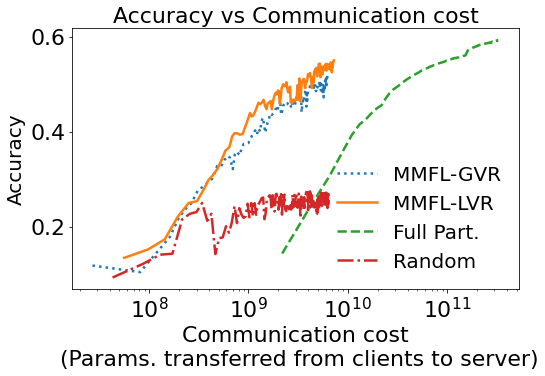

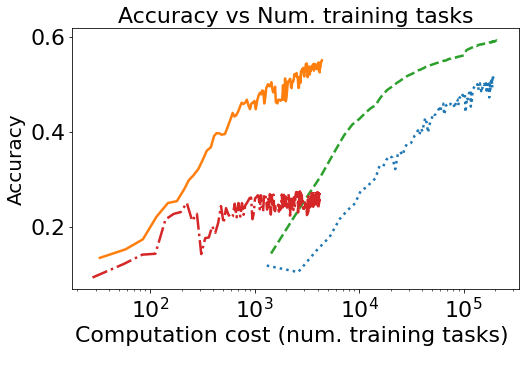

In [80]:
# plot the communication cost and accuracy (x axis as communication cost, y axis as accuracy)
# read mcf_i_globalAcc_exp0_algo0.npy
import numpy as np
import matplotlib.pyplot as plt
# AS
globalAcc_AS = np.load(folder_communicationAS+"/mcf_i_globalAcc_exp0_algo0.npy")
avg_acc_AS = np.mean(globalAcc_AS, axis=0)

# OS
globalAcc_OS = np.load(folder_communicationOS+"/mcf_i_globalAcc_exp0_algo0.npy")
avg_acc_OS = np.mean(globalAcc_OS, axis=0)
plt.figure(figsize=(8, 4.8))
plt.plot(communication_cost_listOS, avg_acc_OS, label="MMFL-GVR", linestyle='dotted', linewidth=2.5)
plt.plot(communication_cost_listAS, avg_acc_AS, label="MMFL-LVR", linestyle='solid', linewidth=2.5)

# full
globalAcc_full = np.load(folder_communicationfull+"/mcf_i_globalAcc_exp0_algo0.npy")
avg_acc_full = np.mean(globalAcc_full, axis=0)
plt.plot(communication_cost_listfull, avg_acc_full, label="Full Part.", linestyle='dashed', linewidth=2.5)

# random
globalAcc_random = np.load(folder_communicationrandom+"/mcf_i_globalAcc_exp0_algo0.npy")
avg_acc_random = np.mean(globalAcc_random, axis=0)
plt.plot(communication_cost_listrandom, avg_acc_random, label="Random", linestyle='dashdot', linewidth=2.5)



# change x axis as log scale
plt.xscale('log')
plt.xlabel("Communication cost\n (Params. transferred from clients to server)", fontsize=22)
plt.ylabel("Accuracy", fontsize=20)
# force lables appear on right bottom
plt.legend(fontsize=20, loc='lower right', frameon=False)
plt.tick_params(axis='both', which='major', labelsize=22)
#plt.legend(fontsize=12)
plt.title("Accuracy vs Communication cost", fontsize=22)
plt.savefig("communicationCompare.pdf", format="pdf", bbox_inches="tight")
# clear
plt.show()

# also plot the task count
plt.figure(figsize=(8, 4.8))
plt.plot(task_count_listOS, avg_acc_OS, label="MMFL-GVR", linestyle='dotted', linewidth=2.5)
plt.plot(task_count_listAS, avg_acc_AS, label="MMFL-LVR", linestyle='solid', linewidth=2.5)
plt.plot(task_count_listfull, avg_acc_full, label="Full Part.", linestyle='dashed', linewidth=2.5)
plt.plot(task_count_listrandom, avg_acc_random, label="Random", linestyle='dashdot', linewidth=2.5)

plt.xscale('log')
plt.xlabel("Computation cost (num. training tasks) \n", fontsize=22)
plt.ylabel("Accuracy", fontsize=20)
# plt.legend(fontsize=20, loc='lower right', frameon=False)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title("Accuracy vs Num. training tasks", fontsize=22)
plt.savefig("computationCompare.pdf", format="pdf", bbox_inches="tight")

In [31]:
def get_optimal_sampling_psi(dis, gradient_record, client_task_ability, clients_process, venn_matrix): # gradient record is norm
    # gradient_record: the shape is [task_index][client_index]
    # chosen_clients provide the index of the chosen clients in a random order
    # clients_task has the same order as chosen_clients
    # multiple tasks sampling will degenerate to single task sampling when task=1
    # therefore we can use the same function.
    sample_num = int(processor_num * 0.1)
    tasks_num = 5
    # random.shuffle(task_indices) # make task order random
    all_clients_num = len(gradient_record[0])
    processes_num = sum(client_task_ability) # client_task_ability [4,2,1,..] client 1 has 4 processes, client 2 has 2 processes

    all_gradients = np.zeros((tasks_num, processes_num))

    for task_index in range(tasks_num):
        for process_index in range(processes_num):
        # from U to U~ in the paper
            client_index = clients_process[process_index]
            all_gradients[task_index][process_index] = gradient_record[task_index][client_index] * dis[task_index][client_index] / client_task_ability[client_index] * venn_matrix[task_index][client_index]

    process_gradients_sumTasks = np.zeros(processes_num) # this is M_i in the proof
    for process_index in range(processes_num):
        for task_index in range(tasks_num):
            process_gradients_sumTasks[process_index] += all_gradients[task_index][process_index]

    # sort the gradients of the clients for this task, get a list of indices
    sorted_indices = np.argsort(process_gradients_sumTasks)

    n = processes_num
    m = sample_num

    l = n - m + 1
    best_l = l
    if m == 0: # if m=0, we get best_l = n+1 above, which is wrong. how to solve?
        best_l = n

    while True:
        l += 1
        if l > n:
            break
        # sum the first l smallest gradients
        sum_upto_l = sum(process_gradients_sumTasks[sorted_indices[i]] for i in range(l))
        upper = sum_upto_l / process_gradients_sumTasks[sorted_indices[l-1]]
        # if 0<m+l-n<=upper, then this l is good. find the largest l satisfying this condition
        if 0 < m + l - n <= upper:
            best_l = l
    # compute p
    p_s_i = np.zeros((tasks_num, processes_num))
    sum_upto_l = sum(process_gradients_sumTasks[sorted_indices[i]] for i in range(best_l))
    # print('sum_upto_l', sum_upto_l)
    for i in range(len(sorted_indices)):
        if i >= best_l:
            for task_index in range(tasks_num):
                p_s_i[task_index][sorted_indices[i]] = all_gradients[task_index][sorted_indices[i]] / process_gradients_sumTasks[sorted_indices[i]]
        else:
            for task_index in range(tasks_num):
                p_s_i[task_index][sorted_indices[i]] = (m + best_l - n) * all_gradients[task_index][sorted_indices[i]] / sum_upto_l

    return p_s_i

In [45]:
def sampling_all3variance(folder): # only can be OS folder
    s_round = 105
    with open(folder+"/client_task_ability.pkl", "rb") as f:
        client_task_ability = pickle.load(f)
    processor2client = {}
    processor_num = sum(client_task_ability)
    p_index = 0
    for c_index in range(120):
        for _ in range(client_task_ability[c_index]):
            processor2client[p_index] = c_index
            p_index += 1
    clients_process = [processor2client[p] for p in range(processor_num)]

    with open(folder+"/psi_OS.pkl", "rb") as f:
        psi_OS = pickle.load(f)
    # random, create a uniform distribution
    psi_random = np.ones((120, 5, processor_num)) * 0.1 # active rate
    # generate psi based on local loss
    # read local loss
    with open(folder+"/localLoss_exp0_algo0.npy", "rb") as f:
        localLoss_exp0_algo0 = np.load(f)
    local_loss = localLoss_exp0_algo0[:, :, s_round]
    # read dis.pickle
    with open(folder+"/dis.pkl", "rb") as f:
        dis = pickle.load(f)
    # read venn_matrix.pkl
    with open(folder+"/venn_matrix.pkl", "rb") as f:
        venn_matrix = pickle.load(f)
    psi_AS = get_optimal_sampling_psi(dis, local_loss, client_task_ability, clients_process, venn_matrix)
    # read gradient_record.pkl
    with open(folder+"/gradient_record_OS.pkl", "rb") as f:
        gradient_record = pickle.load(f)
    gradient_OS = gradient_record[s_round]
    p_s_i_OS = psi_OS[s_round]  # give a random round
    p_s_i_random = psi_random[s_round]
    p_s_i_AS = psi_AS
    p_s_i_list = [p_s_i_AS, p_s_i_OS, p_s_i_random]
    benefit_list = [[] for _ in range(3)]
    # \sum (dis/Bi gradient or loss)^2 / psi
    for idx in range(len(p_s_i_list)):
        p_s_i = p_s_i_list[idx]
        punishment = 0
        gradient_benefit = 0
        loss_benefit = 0
        for task_index in range(5):
            for process_index in range(processor_num):
                client_index = processor2client[process_index]
                if p_s_i[task_index][process_index] == 0:
                    continue
                else:
                    punishment += (dis[task_index][client_index] / client_task_ability[client_index])**2 / p_s_i[task_index][process_index]
                    gradient_benefit += (gradient_OS[task_index][client_index] * dis[task_index][client_index] / client_task_ability[client_index])**2 / p_s_i[task_index][process_index]
                    loss_benefit += (local_loss[task_index][client_index] * dis[task_index][client_index] / client_task_ability[client_index])**2 / p_s_i[task_index][process_index]

        benefit_list[idx].extend([gradient_benefit, loss_benefit, punishment])
    return benefit_list

In [46]:
# compute variance, AS
from tqdm import tqdm
import pickle
import numpy as np
folder_variance_OS = "./result/5task_nnnnn_fffse_lessVenn_OS_a1_14"

b_list = sampling_all3variance(folder_variance_OS)

In [48]:
name = ['AS', 'OS', 'random']
for i in range(3):
    print(name[i], b_list[i])

AS [65.04256380209853, 0.001460760547568982, 3.1789517032718475]
OS [20.24207457305344, 0.014135128751051688, 3.5665338172155305]
random [15.119431931146595, 0.0005719304387549696, 0.6401737466357644]


In [ ]:
# compute variance, OS
folder_variance_OS = "./result/5task_nnnnn_distribution_lessVenn_OS_a1_16"
with open(folder_variance_OS+"/psi_OS.pkl", "rb") as f:
    psi_OS = pickle.load(f)
with open(folder_variance_OS+"/client_task_ability.pkl", "rb") as f:
    client_task_ability = pickle.load(f)
processor2client = {}
processor_num = sum(client_task_ability)
p_index = 0
clients_process = [processor2client[p] for p in range(processor_num)]
for c_index in range(120):
    for _ in range(client_task_ability[c_index]):
        processor2client[p_index] = c_index
        p_index += 1
variance_OS = []
for p_distribution in tqdm(psi_OS):
    variance_OS.append(sampling_variance(p_distribution))


In [ ]:
# build punishment function using random sampling


In [ ]:
# plot variance
import matplotlib.pyplot as plt
plt.plot(variance_AS, label="AS")
plt.plot(variance_OS, label="OS")
plt.legend()
plt.show()

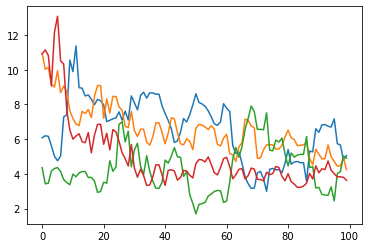

In [6]:
folder_name = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_OS_15"
# read localLoss_exp0_algo0.npy
import numpy as np
import pickle
# read gradient_OS.pkl
with open(folder_name+"/gradient_record_OS.pkl", "rb") as f:
    gradient_OS = pickle.load(f)
gradient_OS = np.array(gradient_OS)
# switch axis 0 1 2 to 1 2 0
gradient_OS = np.transpose(gradient_OS, (1, 2, 0))



import matplotlib.pyplot as plt
# print loss value of a specific client
client_index = 108
plt.plot(gradient_OS[2, client_index, :][0:100])
plt.plot(gradient_OS[2, client_index+1, :][0:100])
plt.plot(gradient_OS[2, client_index+2, :][0:100])
plt.plot(gradient_OS[2, client_index+3, :][0:100])
#plt.plot(localLoss_exp0_algo0_AS[2, client_index-100, :][0:100])
plt.show()

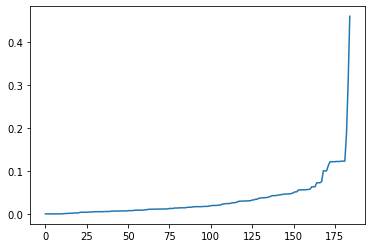

In [23]:
# plot distribution
folder_name = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_OS_14"
# read psi_OS.pkl
import pickle
with open(folder_name+"/psi_OS.pkl", "rb") as f:
    psi_OS = pickle.load(f)
p_round = psi_OS[100]
p_task = p_round[1]
import matplotlib.pyplot as plt
# sort
import numpy as np
sorted_indices = np.argsort(p_task)
plt.plot(p_task[sorted_indices])

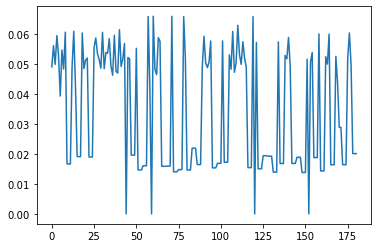

In [11]:
# plot distribution
folder_name = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_AS_15"
# read psi_OS.pkl
import pickle
with open(folder_name+"/psi_AS.pkl", "rb") as f:
    psi_OS = pickle.load(f)
p_round = psi_OS[109] # round
p_task = p_round[2] # task index
import matplotlib.pyplot as plt
plt.plot(p_task)

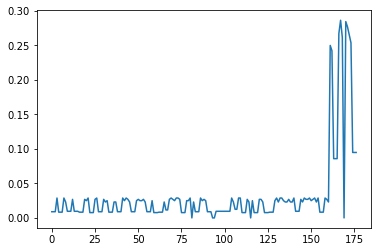

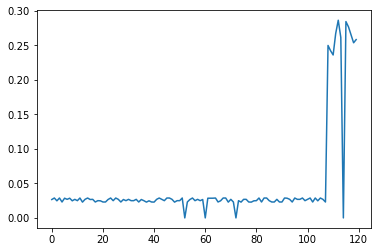

In [49]:
# distribution of
folder = "result/3task_nnnnn_lessVennc0.1uv0.90.1_OSdelta0.03_15"
# read dis.pkl
import pickle
import numpy as np
with open(folder+"/dis.pkl", "rb") as f:
    dis = pickle.load(f)
# read client_task_ability.pkl
with open(folder+"/client_task_ability.pkl", "rb") as f:
    client_task_ability = pickle.load(f)
client_task_ability = np.array(client_task_ability)

processor2client = {}
processor_num = sum(client_task_ability)
p_index = 0
for c_index in range(120):
    for _ in range(client_task_ability[c_index]):
        processor2client[p_index] = c_index
        p_index += 1


datarecord = np.zeros((3, processor_num))
for t in range(3):
    for p in range(processor_num):
        client_index = processor2client[p]
        datarecord[t][p] = dis[t][client_index] / client_task_ability[client_index]
# produce distribution based on this

sample_num = int(processor_num * 0.1)
tasks_num = 3
# random.shuffle(task_indices) # make task order random
all_clients_num = len(datarecord[0])


process_gradients_sumTasks = np.zeros(processor_num) # this is M_i in the proof
for process_index in range(processor_num):
    for task_index in range(tasks_num):
        process_gradients_sumTasks[process_index] += datarecord[task_index][process_index]

# sort the gradients of the clients for this task, get a list of indices
sorted_indices = np.argsort(process_gradients_sumTasks)

n = processor_num
m = sample_num

l = n - m + 1
best_l = l
if m == 0: # if m=0, we get best_l = n+1 above, which is wrong. how to solve?
    best_l = n

while True:
    l += 1
    if l > n:
        break
    # sum the first l smallest gradients
    sum_upto_l = sum(process_gradients_sumTasks[sorted_indices[i]] for i in range(l))
    upper = sum_upto_l / process_gradients_sumTasks[sorted_indices[l-1]]
    # if 0<m+l-n<=upper, then this l is good. find the largest l satisfying this condition
    if 0 < m + l - n <= upper:
        best_l = l
# compute p
p_s_i = np.zeros((tasks_num, processor_num))
sum_upto_l = sum(process_gradients_sumTasks[sorted_indices[i]] for i in range(best_l))
# print('sum_upto_l', sum_upto_l)
for i in range(len(sorted_indices)):
    if i >= best_l:
        for task_index in range(tasks_num):
            p_s_i[task_index][sorted_indices[i]] = datarecord[task_index][sorted_indices[i]] / process_gradients_sumTasks[sorted_indices[i]]
    else:
        for task_index in range(tasks_num):
            p_s_i[task_index][sorted_indices[i]] = (m + best_l - n) * datarecord[task_index][sorted_indices[i]] / sum_upto_l

# rank p_s_i and plot
p_task = p_s_i[1]
sorted_indices = np.argsort(p_task)
import matplotlib.pyplot as plt
plt.plot(p_task)
plt.show()

p_client = np.zeros(120)
for processor_index in range(processor_num):
    client_index = processor2client[processor_index]
    process_num = client_task_ability[client_index]
    p_client[client_index] = 1 - (1-p_task[processor_index])**process_num
# plot p_client
# sort
sorted_indices = np.argsort(p_client)
plt.plot(p_client)
plt.show()


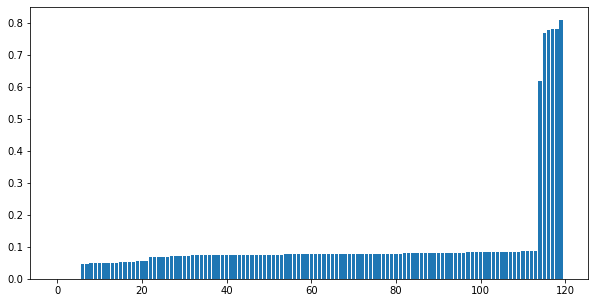

In [51]:
p_client = np.zeros(120)
psi_sum = np.sum(p_s_i, axis=0)
for processor_index in range(p_N):
    client_index = processor2client[processor_index]
    process_num = client_task_ability[client_index]
    p_client[client_index] = 1 - (1-psi_sum[processor_index])**process_num
# sort and plot bar
sorted_index = np.argsort(p_client)
# color
# color_list_processor = []
# for c_index in sorted_index:
#     index = c_index
#     if client_task_ability[index] == 1:
#         color_list_processor.append('blue')
#     elif client_task_ability[index] == 2:
#         color_list_processor.append('green')
#     elif client_task_ability[index] == 3:
#         color_list_processor.append('yellow')
#     elif client_task_ability[index] == 4:
#         color_list_processor.append('orange')
#     elif client_task_ability[index] == 5:
#         color_list_processor.append('red')
# plot
p_client[sorted_index[:6]]=0
import matplotlib.pyplot as plt
length = range(len(p_client))
plt.figure(figsize=(10, 5))
plt.bar(length, p_client[sorted_index])
plt.show()

(150, 3, 120)


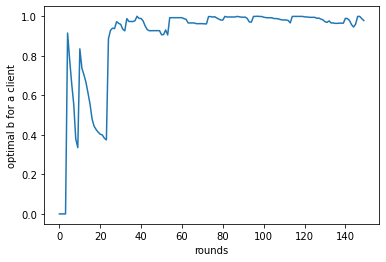

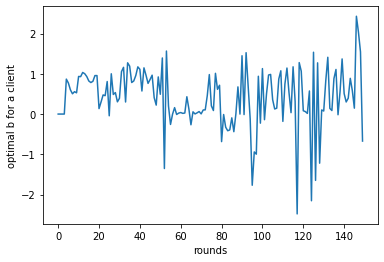

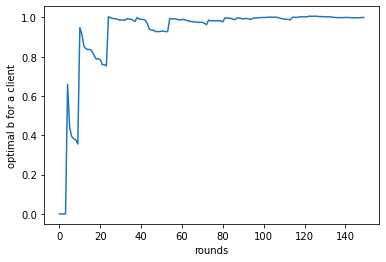

In [13]:
import numpy as np
folder_name = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_Diffstale_Ob_f2ff2_19"
# read gradient_AS.pkl
import pickle
with open(folder_name+"/optimal_b_list.pkl", "rb") as f:
    optimal_b_list = pickle.load(f)
# last round
optimal_b_list = np.array(optimal_b_list) # 150 3 120
print(optimal_b_list.shape)
import matplotlib.pyplot as plt
length = range(len(optimal_b_list))
plt.plot(length, optimal_b_list[:,0,1])
# # x-axis: rounds, y: gradient-norm
plt.xlabel("rounds")
plt.ylabel("optimal b for a client")
plt.show()

plt.plot(length, optimal_b_list[:,1,1])
# # x-axis: rounds, y: gradient-norm
plt.xlabel("rounds")
plt.ylabel("optimal b for a client")
plt.show()

plt.plot(length, optimal_b_list[:,2,1])
# # x-axis: rounds, y: gradient-norm
plt.xlabel("rounds")
plt.ylabel("optimal b for a client")
plt.show()

(3, 120, 150)


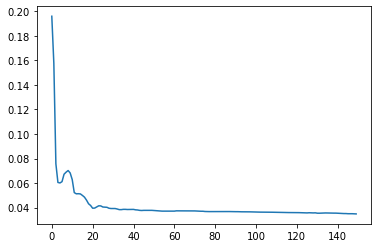

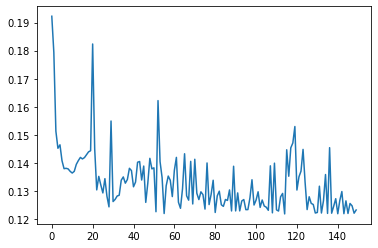

In [9]:
# read localLoss_exp0_algo0.npy
import numpy as np
folder_name = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_Diffstale_Ob_f2ff2_19"
import pickle
with open(folder_name+"/localLoss_exp0_algo0.npy", "rb") as f:
    localLoss_exp0_algo0 = np.load(f)
print(localLoss_exp0_algo0.shape) # 3 (task) 120 (client) 150 (round)

# plot one client task loss
import matplotlib.pyplot as plt
plt.plot(localLoss_exp0_algo0[0, 0, :])
plt.show()
plt.plot(localLoss_exp0_algo0[1, 0, :])
plt.show()


(3, 150)


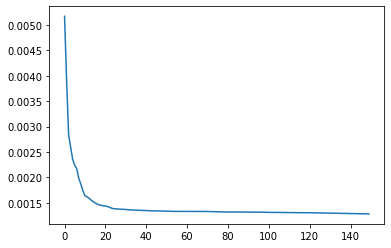

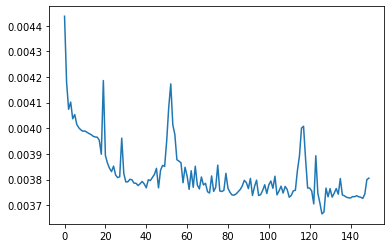

In [11]:
import numpy as np
folder_name = "./result/3task_nnnnn_lessVennc0.1uv0.90.1_Diffstale_Ob_f2ff2_19"
import pickle
with open(folder_name+"/mcf_i_globalLoss_exp0_algo0.npy", "rb") as f:
    localLoss_exp0_algo0 = np.load(f)
print(localLoss_exp0_algo0.shape) # 3 (task) 120 (client) 150 (round)

# plot one client task loss
import matplotlib.pyplot as plt
plt.plot(localLoss_exp0_algo0[0, :])
plt.show()
plt.plot(localLoss_exp0_algo0[1, :])
plt.show()